# Linear Regression Demo

In the example below, we will use the Boston Housing dataset found in the datasets package in Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for visualization 
%matplotlib inline

## Load the Datasets

In [2]:
from sklearn.datasets import load_boston
Boston = load_boston()
print (Boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# reset data to DataFrame
df = pd.DataFrame(Boston.data)

# label columns
df.columns = Boston.feature_names

# Set price column for target
df['Price'] = Boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Primary Visualization 

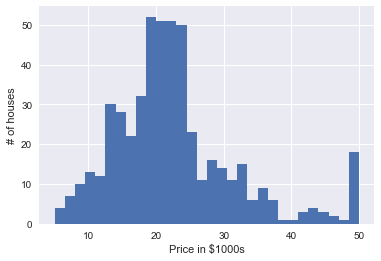

In [4]:
# Histogram of prices
plt.hist(df.Price,bins=30)
plt.xlabel('Price in $1000s')
plt.ylabel('# of houses')
plt.show()

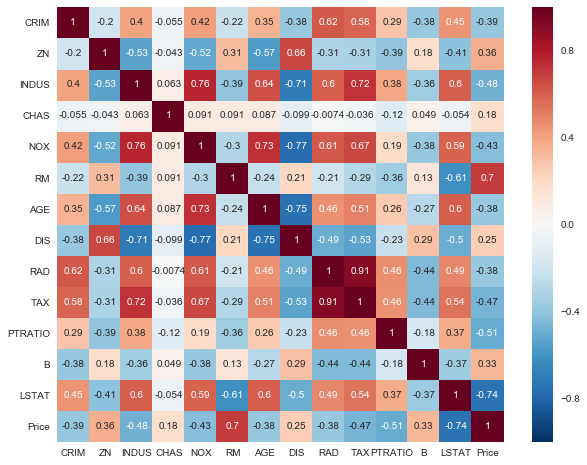

In [5]:
# Correlation Matrix
corrmat = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(data=corrmat,annot=True)#annoy = true 代表要把数字显示出来
plt.show()

We can see the RM (average number of rooms per dwelling) and Price have relatively stronge linear correlation. Let's see how it looks like.

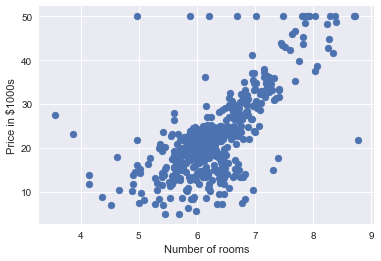

In [6]:
plt.scatter(df.RM,df.Price)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')
plt.show()

There is a slight trend that price increases along with the number of rooms in that house, which intuitively makes sense.

# Use Scikit-Learn to build a Linear Regression Model

In [7]:
# Import Linear Regression Package
import sklearn
from sklearn.linear_model import LinearRegression

In [8]:
# Data Matrix
X = df.drop('Price',axis=1)

# Targets
Y = df.Price

In [9]:
# Train-Test Split to validate the model
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)#80%data as training data

E:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Print shapes of the training and testing data sets
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [11]:
# Create a LinearRegression Object
lr = LinearRegression()

In [12]:
# Implement Linear Regression
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Show the coefficient of each column
coeff = pd.DataFrame(df.columns)
coeff.columns = ["Features"]
coeff["Coefficient Estimate"] = pd.Series(lr.coef_)
coeff

,Features,Coefficient Estimate
0,CRIM,-0.130872
1,ZN,0.050988
2,INDUS,0.038180
3,CHAS,3.116583
4,NOX,-22.239842
5,RM,3.935625
6,AGE,0.004193
7,DIS,-1.540350
8,RAD,0.330982
9,TAX,-0.013499


In [14]:
# Predictions on training set and testing set by using the fitted linear model
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [15]:
# Use MSE (Mean Square Error) to evaluate our model
from sklearn import metrics
print("MSE on Training Dataset is %.2f" %metrics.mean_squared_error(Y_train, pred_train))
print("MSE on Testing Dataset is %.2f" %metrics.mean_squared_error(Y_test, pred_test))

MSE on Training Dataset is 21.42
MSE on Testing Dataset is 24.54


# Residual Plot

The difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e):

$$Residual = Observed\:value - Predicted\:value $$

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is good for the dataset. 

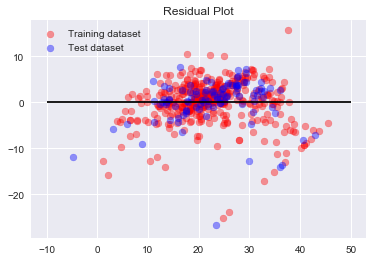

In [16]:
# Residual Plot
train = plt.scatter(pred_train,(pred_train-Y_train),c='r',alpha=0.4)
test = plt.scatter(pred_test,(pred_test-Y_test),c='b',alpha=0.4)

# Plot a horizontal axis line at residual=0
plt.hlines(y=0,xmin=-10,xmax=50)

plt.legend((train,test),('Training dataset','Test dataset'))
plt.title('Residual Plot')
plt.show()

Most of the residuals are randomly allocated above and below the horizontal. Linear Model is suitable for this dataset.